<a href="https://colab.research.google.com/github/jermwatt/computational_maths/blob/collab/Part_1_mathematical_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computational Mathematics 

# Part 1: What is a mathematical function?

In this series of notebooks we discuss the basics of a vitally important concept: the mathematical function.  So completely do the idea of mathematical functions permeate  science and mathematics - from their use as modeling tools to being objects of study themselves - that most readers have certainly encountered them in some fashion at some point in their lives.  

In machine learning / deep learning we are always dealing with mathematical functions - from the framing of a learning problem, to the derivation of a cost function, to the development and use of mathematical optimization techniques, to the design of features - they are ever-present in our work.  And while from an outsider's perspective their usage in the field may seem to astound, arising in un-ending variation, insiders learn to appreciate how these many variations arise as small (albeit sometimes quite clever) twists on a handful of fundamental ideas.  Indeed we will see that such a statement applies equally well to other major technical tools and frameworks used in machine learning / deep learning as well, particularly those which use mathematical functions as a basic building block.  But lets not get ahead of ourselves - first things first.

In this short series of notebooks we review some fundamental ideas regarding mathematical functions, ideas that we will see used over and over again throughout our study of machine learning / deep learning.  We begin here by introducing the notion of a mathematical function in terms of real data and then in terms of equations / formulae.

In [2]:
# import standard libs
import os
import pandas as pd
import numpy as np

# setup steps if running on local machine / container
if not os.getenv("COLAB_RELEASE_TAG"):
    # make sure autograd is installed on machine / container
    !pip3 install autograd
    
    # append path to data / custom library
    import sys
    sys.path.append('../')
    
    # import custom library
    from compmaths_libraries import basics_library as baslib
else: # # setup steps if running on collab
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone

    # clone library subdirectory
    !ghclone https://github.com/jermwatt/computational_maths/tree/collab/compmaths_libraries 
    from compmaths_libraries import basics_library as baslib
    
    # clone datasets
    !ghclone https://github.com/jermwatt/computational_maths/tree/collab/compmaths_data

    # clone images
    !ghclone https://github.com/jermwatt/computational_maths/tree/collab/compmaths_images

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=e4645cca1a4258795961334ca669934d52a4406dfc8cdbe5bbbce75757cd36b5
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Cloning into 'compmaths_libraries'...
done.
Cloning into 'compmaths_data'...
done.
Cloning into 'compmaths_images'...
done.


# 1.  The mathematical function concept 

What is a mathematical function?  In this short Section we describe the fundamental idea of a mathematical function.  We also introduce common function notation and detail the form in which functions are most commonly seen in today's modern world: as a table of values (or collection of data).  Much of the discussion in these examples is obvious, it is largely the vocabulary (e.g., 'data is a mathematical function', 'a mathematical function is a rule that relates inputs to outputs') that we need to get straight in our minds.

## 1.1  The mathematical function

To get an intuitive sense for what a mathematical function is, lets look a number of examples.

#### <span style="color:#a50e3e;">Example </span> Historical revenue of McDonalds

The Python cell below prints out the first few values dataset [[1]](#bib_cell) - a listing of the annual total revenue of the fastfood resturant chain McDonald's over a period of five years.

In [3]:
# read in a dataset
mcdonalds_revenue = pd.read_csv('compmaths_data/mcdonalds_revenue.csv')

# display table of values
baslib.basics_plotter.table_plot(table = mcdonalds_revenue[:5])

Year,Revenue (in billions $)
2005,19.12
2006,20.90
2007,22.79
2008,23.52
2009,22.75


This data consists of a table of values with two columns - the 'Year' revenue is tracked in the first column, and the total revenue of the company is in the second.  When we examine a table like this we naturally scan across each row to process its information - in the Year 2005 the Revenue was 19.12 billion dollars, in 2006 the revenue was 22.90 billion dollars, etc., - and in processing we start to understand the relationship between the *input value* 'Year' and *output value* 'Revenue'.  We start to see each row as a *datapoint*, consisting of one input value and one output value, or taken together an *input/output pair*.  For example the first row contains a datapoint or input/output pair $(\text{Year},\text{Revenue}) = (2005,19.12)$, the second row $(\text{Year},\text{Revenue}) = (2006,20.90)$, and so on.

This might not be what you expect a 'mathematical function' to look like - but it is.  This dataset is a typical example of a mathematical function - which is just a rule defining how *input values* and *output values* of a dataset or *system* relate to one another.  Here the rule is explicit in the data itself: when the input 'Year' is 2005, the output 'Revenue' is 19.12 (billion dollars), when the input is 2006, the output is 20.90, and so forth.  In other words, here the phrase 'mathematical function' just means 'a dataset consisting of input/output pairs'.

We often plot such a mathematical function to make its relationship more visually explicit -  as we do in the next Python cell (note here that we plot the entire dataset which consists of 12 input/output pairs).

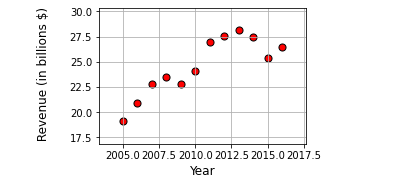

In [6]:
# create function
mcd_table = np.asarray(mcdonalds_revenue)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = mcd_table,xlabel = mcdonalds_revenue.columns[0],ylabel = mcdonalds_revenue.columns[1],plot_type = 'scatter',rotate_ylabel = 90,label_fontsize = 12)

Here each input/output pair from the data is drawn as a unique red circle - because the input 'Year' is naturally ordered from smallest to largest - the plot can easily be related to the raw table of values: points from the table - starting at the top and moving down - are here plotted from left to right.

#### <span style="color:#a50e3e;">Example </span> Chiquita global revenue

Lets examine another dataset of a similar vein [[2]](#bib_cell)  - the total revenue of the Chiquita banana company.  The next Python cell plots the first few points from this dataset.

In [ ]:
# read in a dataset
chiquita_rev = pd.read_csv('../compmaths_data/chiquita_revenue.csv')

# display table of values
baslib.basics_plotter.table_plot(table = chiquita_rev[:5])

Similar to the McDonalds data, this dataset also describes the revenue of a large company and is again a mathematical function.  There are only slight differences here from the first dataset - first, we can see that the measurements are more frequent here than in first dataset, as the input 'Quarter' (whose values are listed as decimals) gives us four datapoints of revene per year.  Secondly the output - here still 'Revenue' - is of a diffeerent scale than the first dataset, here we are dealing with hundreds of millions instead of billions as was the case previously.  Nonetheless, we still have a mathematical function relating input values ('Quarter') to output values ('Revenue').

Again we can visualize the entire dataset to better appreciate the input/output relationship, as is done in the next Python cell.

In [ ]:
# create function
chiq_table = np.asarray(chiquita_rev)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = chiq_table,xlabel = chiquita_rev.columns[0],ylabel = chiquita_rev.columns[1],plot_type = 'scatter',guides = 'on',rotate_ylabel = 90,label_fontsize = 12)

One again each input/output pair from the data is drawn here as a unique red circle - with added light red lines connecting consecutive datapoints for visualization purposes only. Again because the input 'Quarter' is naturally ordered from smallest to largest - the plot can easily be related to the raw table of values: points from the table - starting at the top and moving down - are here plotted from left to right on the graph.

#### <span style="color:#a50e3e;">Example </span> The McDonalds menu

A restaurant menu [[3]](#bib_cell)  - like the one from McDonalds printed out by the next Python cell - provides a cornucopia of mathematical functions.

In [ ]:
# read in a dataset
mcd_menu = pd.read_csv('../compmaths_data/mcdonalds_menu.csv')

# display the first few values from the table
baslib.basics_plotter.table_plot(table = mcd_menu[:5])

Here we have a dataset of food items, along with a large number of characteristics for each.  Where is the mathematical function here?  Where is its input and output?  Here - unlike the previous examples - there are many choices.  We decide what goes in, and what comes out.  What rule about the quantities listed in this dataset might we like to better understand? 

For example, we could decide to look at the relationship between the food item and its allotment of calories.  Segmenting out just these two columns from the dataset we print out the first few data points using the next Python cell.

In [ ]:
# display the first few values from the table - using only the 'Item' and 'Calories' columns
baslib.basics_plotter.table_plot(table = mcd_menu[['Item','Calories']][:5])

Notice here - unlike the previous examples - our input is not numerical.  Thats fine - we still have a mathematical function relating inputs ('Item') to outputs ('Calories').  Because we have so much information on each food item, we could have just as well chosen a different output - say 'Total Fat'.  In the next Python cell we print out our input 'Item' and this output together - just the first few data points.

In [ ]:
# display the first few values from the table - using only the 'Item' and 'Total Fat' columns
baslib.basics_plotter.table_plot(table = mcd_menu[['Item','Total Fat']][:5])

Again we have a perfectly useful mathematical function relating inputs ('Item') to outputs ('Total Fat').

#### <span style="color:#a50e3e;">Example </span>  Digital images

It is not always the case that a dataset / mathematical function comes in the form of a labeled table - as with the previous examples - where input and output are placed neatly in separate columns.  Take a standard grayscale image - like handwritten digit '0' plotted by the next Python cell.

In [ ]:
# load in image path
img_path = '../compmaths_images/digit.png'

# plot image
baslib.image_function_plotter.reveal_imgpatch(img_path = img_path)

The left panel displays the raw image itself - so small that we can actually see all of the individual pixels that make it up.  Although we may not always think of them as one, a grayscale image like this is in fact a mathematical function.  Grayscale images are in fact
2-dimensional arrays of numbers with height and width equal to the number of pixels in the image itself.  This view of our digit image is plotted in the middle panel in the Figure above.  Here we see that this image is in fact an $8\times8$ array of numbers, with each number (printed red on top of its respective pixel) representing the intensity value of each pixel -  ranging from 0 (completely back) to $255$ (completely white). 

As a mathematical function the grayscale image relates a pair of indices - indicating a specific row and column of the array -  (the inputs) to a given pixel intensity value (the output).  For example, in the middle panel in the Figure above we can see that the index pair $(0,0)$ has pixel value $255$, the index pair $(0,2)$ has the pixel value $170$, the pair $(1,3)$ has value $0$, and so forth.  

Note that we can if we desire write out this function as a table, as with the previous examples.  Writing out the first four values in the first row we have

<br>
<table>
    <thead style="background-color;">
        <tr>
            <th>input: &nbsp;$(\text{row #},\text{column #})$</th>
            <th>output: &nbsp;$\text{pixel value}$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$(0,0)$</td>
            <td class="centered">$255$</td>
        </tr>
        <tr>
            <td class="centered">$(0,1)$</td>
            <td class="centered">$255$</td>
        </tr>
        <tr>
            <td class="centered">$(0,2)$</td>
            <td class="centered">$170$</td>
        </tr>
        <tr>
            <td class="centered">$(0,3)$</td>
            <td class="centered">$34$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

where the $\vdots$ notation indicate that the list keeps on going (in this case to list 60 further input/output pairs).  

Regardless of how we record them, each input/output pair in a grayscale image is a 3-dimensional point - two values (indices) for each input, one value per output - and so if we want we can plot any grayscale image as  a surface in 3-dimensional space.  We do this for the digit image in the right panel of the Figure, and can now physically see how each input (a pair of indices) relates to its pixel value - that is the height of each output (we also color each output its corresponding grayscale value for visualization purposes). 

Viewing a more complicated image in this way  - as a surface in 3d - can be quite interesting visually speaking.  Take for example the image [[4]](#bib_cell) printed by the next Python cell.  This cell will printout both the color and grayscale versions of an input image.

In [ ]:
# Provide a path to a color image 
img_path = '../compmaths_images/nurg.jpg'

# show the color and grayscale version of this image
baslib.image_function_plotter.show_color_gray(img_path = img_path)

In the next Python cell we show the grayscale form of this image in 3-dimensions.  We also animate a range of viewing angles on this surface just for fun - you can move the slider from left to right to transition smoothly between viewing angles.  The pre-set viewing route takes you from 90 degrees above the image to 90 degrees below it in a spiral.

In [ ]:
# Provide a path to a color image, this will be converted to grayscale for the animation
img_path = '../compmaths_images/nurg.jpg'

# animate a range of viewing angles of this image in 3-dimensions
num_frames = 20
baslib.image_function_plotter.grayimg_as_function(img_path = img_path, num_frames = num_frames,shrink_factor = 0.1,plot_type = 'proto')

## 1.2 Summary and function notation

We have just seen an array of mathematical functions - and we haven't even scratched the surface of what is out there.  But from what we have seen we can say summarize what a mathematical function is in a pithy and quite generalizable way: a rule that relates inputs to outputs.  In a dataset like the ones we have seen so far this rule is explicit - it literally *is* the data itself.  We find these rules everywhere.  Sometimes - as with the menu example - we have to pluck out a mathematical function from a sea of choices, sometimes - as with the grayscale image example - the input/output relationship may not at first be clear.  But nonetheless - mathematical functions abound.

> A mathematical function is a rule that relates inputs to outputs in a dataset or system. 

This omnipresence motivates the use of mathematical notation - which we use to represent generic input/output pairs, as well as generic mathematical functions.  Among other benefits this allows us to more freely discuss functions at a higher level, categorize them by certain shared attributes, and build multi-use tools based on very general principles.  This is also how we can tie our discussion here to what one might traditionally think of when they see the phrase 'mathematical functions', i.e., mathematical formulae and equations.

First - a general notation to denote one type of input to a function is typically given by a single letter, and we will often use $w$ or $x$ to denote a single type of input.  For instance, in the first example about the historical revenue of McDonalds the input 'Year' would be denoted by the single letter $x$.  A generic output is also typically denoted using a single letter - we will typically use $f$, $g$, or $y$.  In the McDonalds revenue example the output 'Revenue' could then be expressed as $y$.

To denote the mathematical function relating $x$ to $y$ we use the notation $y(x)$ - in English this is said '$y$ of $x$'.   Again in the McDonalds revenue case this notation in English says - the output 'Revenue' is a mathematical function of the input 'Year'.  The function notation (in this case $y(x)$) is often used to denote the output (in this case $y$) as well.

If we rewrote the very first table of McDonalds revenue we showed using this notation, it would look like this
<br>
<table>
    <thead style="background-color;">
        <tr>
            <th>input: &nbsp;$x$</th>
            <th>output: &nbsp;$y(x)$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$2005$</td>
            <td class="centered">$19.12$</td>
        </tr>
        <tr>
            <td class="centered">$2006$</td>
            <td class="centered">$20.90$</td>
        </tr>
        <tr>
            <td class="centered">$2007$</td>
            <td class="centered">$22.79$</td>
        </tr>
        <tr>
            <td class="centered">$2008$</td>
            <td class="centered">$23.52$</td>
        </tr>
                <tr>
            <td class="centered">$2009$</td>
            <td class="centered">$22.75$</td>
        </tr>
    </tbody>
</table>
<br>

Likewise if we have more than one input to our function - as was the case with the grayscale image example - we use a distinct notation for each input.  With two inputs we can use $x_1$ for the first input and $x_2$ for the second - so the general input pair is represented as $(x_1, x_2)$.  Our function - which takes in these index pairs in general - could then be denoted as $y(x_1,x_2)$, and our table of input/output pairs shown for the grayscale digit image looks like

<br>
<table>
    <thead style="background-color;">
        <tr>
            <th>input: &nbsp;$(x_1,x_2)$</th>
            <th>output: &nbsp;$y(x_1,x_2)$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$(0,0)$</td>
            <td class="centered">$255$</td>
        </tr>
        <tr>
            <td class="centered">$(0,1)$</td>
            <td class="centered">$255$</td>
        </tr>
        <tr>
            <td class="centered">$(0,2)$</td>
            <td class="centered">$170$</td>
        </tr>
        <tr>
            <td class="centered">$(0,3)$</td>
            <td class="centered">$34$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

# 2.  Mathematical function equations

Here we review the classic way mathematical functions are described in secondary school: using an algebraic equations or formulae.  In the process we discuss how these functions implicitly produce datasets like the ones we have seen previously.  Finally we point out and contrast the value of having a function equation over even a complete set of data defining a function.

## 2.1  The function equation

Previously we have discussed mathematical functions as they arise in various sorts of data.  A more classical way of thinking about mathematical functions is via an **equation** or **formula**. For example, take the equation of a line

<p>
\begin{equation}
y = w_0 + w_1x
\end{equation}
</p>

This is an explicitly written rule for taking an input $x$ and transforming it into an associated output $y$. Given a specific input $x$ how do we transform it to get its associated output? According to the equation of the line, we simply multiply the input by the weight $w_1$ (called the *slope* or steepness of the line) and add to this the weight $w_0$ (called the *vertical intercept* - where the line strikes the vertical axis).

In the next cell we plot a picture of this equation. Here we have set  $w_0=−3$  and  $w_1=2$  to create one instance of a line shown in red, plotted over the input range (values of $x$) from $-5$ to $5$.

In [ ]:
# specify range of input for our function
x = np.linspace(-5,5,50)

# set the weights
w_0 = -3
w_1 = 2

# form the equation
y = w_0 + w_1*x

# make a table of values for our function
line_table = np.stack((x,y), axis=1)  

# use custom plotter to display function
baslib.basics_plotter.single_plot(table = line_table,xlabel = '$x$',ylabel = 'y',rotate_ylabel = 0)

Another common function equation is the **parabola** - its one step more complicated than a line. To get a parabola we take the line described above and add to it the value $w_2x^2$ - that is we square the input $x$ and multiply it by a weight $w_2$.  This gives the general form of a parabola

<p>
\begin{equation}
y = w_0 + w_1x + w_2x^2
\end{equation}
</p>

Again we can plot a parabola with explicit values for the weights $w_0$, $w_1$, and $w_2$. In the next cell we set $w_0=−3$, $w_1=2$, and $w_2=1$, and plot the parabola over the same input range (values of $x$) as the line.

In [ ]:
# specify range of input for our function
x = np.linspace(-5,5,50)

# set the weights
w_0 = -3
w_1 = 2
w_2 = 1

# form the equation
y = w_0 + w_1*x + w_2*x**2

# make a table of values for our function
parabola_table = np.stack((x,y), axis=1)

# use custom plotter to display function
baslib.basics_plotter.single_plot(table = parabola_table,xlabel = '$x$',ylabel = '$y$',rotate_ylabel = 0)

Writing down the equation of the line, parabola, or any other formula gives us its rule *explicitly* - its recipe for transforming inputs into outputs.  An equation is a powerful form of a mathematical function.

> A formula or equation is a mathematical function, explicitly defining a rule for transforming inputs into outputs.

## 2.2  Equations as data

Another way to think about an equation is to view it as the actual set of input/output pairs it defines, or in other words, as a dataset. For example, for the line

<p>$$y = w_0 + w_1x$$</p>

that we plotted previously with $w_0=−3$ and $w_1=2$, this table of values looks like

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$x$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$-3$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$-3.8$</td>
        </tr>
        <tr>
            <td class="centered">$2.8$</td>
            <td class="centered">$2.6$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$5$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

The vertical dots $\vdots$ in each column indicate that we could keep on listing off input and output pairs (in no particular order).  If we list out every possible input/output pair using the equation - this would be infinitely long - then this dataset is equivalent to the equation defining it.

As with the line, we can also view a parabola described earlier either as its equation or as its associated table of values. For the choice of weights we used previously, the 'dataset' view of our parabola looks like

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$x$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$-3$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$-1.56$</td>
        </tr>
        <tr>
            <td class="centered">$2.8$</td>
            <td class="centered">$10.44$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$-4$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

Once again the three vertical dots in each column indicate that this list is infinitely long. If we list out every single input/output pair defined by the equation than any input value we can think of will be found at some point on this table, along with its associated output.  If this is the case then this dataset is equivalent to the equation defining it.

> We can view an equation equivalently in two ways: either via its mathematical expression or as a dataset consisting of a complete listing of the function's input/output pairs.

Using a subset of data generated by an equation, we can visualize equations with one or two inputs by plotting their graphs. Notice that the plots produced this way we showed previously - which were plotted by creating a sample of data over 50 evenly spaced inputs on the interval $[-5,5]$ -  are not strictly speaking *continuous*, although they visually appear to be so. Those plots we made previously are actually kind of a trick - an optical illusion. If you look closely you can see that we only *sampled* input/output data points for each equation's table of values - we couldn't plot infinitely many points!  The plots *look* continuous - the way we might draw them using pencil and paper - because we used the <code>plot</code> function from Python's matplotlib library which interpolates smoothly between points it plots. 

If instead we use <code>scatter</code> to plot the two functions - using the same input/output pairs as plotted previously -  you can really see all the input/output points we defined individually. We do this in the next Python cell.

In [ ]:
# specify range of input for our functions
x = np.linspace(-5,5,50)    

# generate line table
w_0 = -3
w_1 = 2
y = w_0 + w_1*x
line_table = np.stack((x,y), axis=1) 

# generate parabola table
w_0 = -3
w_1 = 2
w_2 = 1
y = w_0 + w_1*x + w_2*x**2
parabola_table = np.stack((x,y), axis=1) 

# use custom plotter to show both functions
baslib.basics_plotter.double_plot(table1 = line_table, table2 = parabola_table,plot_type = 'scatter',xlabel = '$x$',ylabel_1 = '$y$',ylabel_2 = '$y$',fontsize = 18)

## 2.3  Equations taking in more than one input

The duality of viewing an equation - either via its mathematical expression or as a complete dataset listing its input/output pairs - holds regardless of what dimension the equation lives in. For example, a line that takes in two inputs ($x_1$ and $x_2$ instead of just $x$) is  called a *plane* or *hyperplane*, and its equation generally takes the form

<p>
\begin{equation}
y=w_0 + w_1x_1 + w_2x_2
\end{equation}
</p>

where $w_0$ , $w_1$, and $w_2$ are tunable weights.  Here $w_0$ is once again the vertical intercept (the value at which the hyperplane strikes the vertical axes), and $w_1$ and $w_2$ are both 'slopes' - quantifying the steepness of the hyperplane in each of the input directions.

For any particular set of weights we can write out a complete table of values for this equation. For example, if we set $w_0=3$, $w_1=−2$, and $w_2=0.5$, we can create a table of values like this

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$(x_1,x_2)$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$(0,0)$</td>
            <td class="centered">$3$</td>
        </tr>
        <tr>
            <td class="centered">$(1,2)$</td>
            <td class="centered">$2$</td>
        </tr>
        <tr>
            <td class="centered">$(3.14,1.6)$</td>
            <td class="centered">$4.88$</td>
        </tr>
        <tr>
            <td class="centered">$(-1,1)$</td>
            <td class="centered">$-4$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

If this table is complete it equivalently defines the equation.

Using a subset of input/output pairs we can visualize the equation - as we do in the next Python cell.

In [ ]:
# specify range of input for for x1 and x2
s = np.linspace(-5,5,50)                  
x_1, x_2 = np.meshgrid(s,s)

# set the weights
w_0 = 3
w_1 = -2
w_2 = 0.5

# form the equation
y = w_0 + w_1*x_1 + w_2*x_2

# make a table of values for our function
line_table = np.stack((x_1,x_2,y), axis=1)  

# use custom plotter to display function
baslib.basics_plotter.single_plot(table = line_table,xlabel='$x_1$',ylabel='$x_2$',zlabel='$y$',fontsize=20)

A higher dimensional parabola works analogously. The general equation with 2 inputs takes the form

<p>
\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + a_4x_1^2 + w_5x_2^2
\end{equation}
</p>

For any weight setting we can write out a table of values, or plot a small section of the table as in the next Python cell, where we have set $w_0=3$, $w_1=−2$, $w_2=0.5$, $w_3=1.3$, $w_4=−0.3$, and  $w_5=4$.

In [ ]:
# specify range of input for for x1 and x2
s = np.linspace(-5, 5, 50)                 
x_1, x_2 = np.meshgrid(s, s)

# set the weights
w_0 = 3
w_1 = -2
w_2 = 0.5
w_3 = 1.3
w_4 = -0.3
w_5 = 4

# form the equation
y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*x_2 + w_4*x_1**2 + w_5*x_2**2

# make a table of values for our function
parabola_table = np.stack((x_1,x_2,y), axis=1)  

# use custom plotter to display function
baslib.basics_plotter.single_plot(table = parabola_table,xlabel='$x_1$',ylabel='$x_2$',zlabel='$y$',fontsize=20)

## 2.4  Which better describes math function - the equation or its equivalent dataset?

If we could only choose one, which would we rather have: the mathematical equation itself or the dataset consisting of all its input/output pairs written out explicitly?  In the latter case we would not have access to the mathematical expression describing the equation algebraically, only the (possibly infinitely long) table of values.

Well, if we have the expression we have already seen how we generate the equation's associated table of input/output values - at least in theory we simply list out every input/output pair using the equation to generate the pairs.  In other words, if we have access to the equation itself we get the dataset for free. How about the reverse? If we had a table of values describing an equation but not the mathematical form of the equation itself, could we intuit the it?  With the dataset in hand do we get the algebraic form of the equation for free?  The answer is - in general - *no*.

If we only have access to a dataset describing an equation - and not the mathematical expression itself - it is often not obvious how to draw conclusions vis-a-vis the associated algebraic form of the original equation. That is, supposing we could visually examine a (possibly infinitely long) raw table of values like this one 

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$x$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$-3$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$-1.56$</td>
        </tr>
        <tr>
            <td class="centered">$2.8$</td>
            <td class="centered">$10.44$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$-4$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

we still might not be able to intuit an equation.

We could plot the table of values, or some portion of it, as we have been doing so far. Using the plot we could then try to determine the equation 'by eye'. That would probably be much easier than just looking at a table of numbers. Let's plot a few examples and see if this is do-able. See if you can guess the equation associated with each. After you have made your guess you can scroll down a bit to see the associated equations.

In [ ]:
# load in table of values for two functions
first_table = np.loadtxt('../compmaths_data/guess_this_1.txt', delimiter=',')
second_table = np.loadtxt('../compmaths_data/guess_this_2.txt', delimiter=',')

# use custom plotter to show both functions
baslib.basics_plotter.double_plot(table1 = first_table, table2 = second_table,plot_type = 'continuous',xlabel = '$x$',ylabel_1 = '$y$',ylabel_2 = '$y$',fontsize = 18)

Having plotted the table of values for both functions, you may have been able to spot the equation for the example on the left if you are familiar with elementary functions (we will discuss these in the next post). It is in fact

<p>$$y=\text{sin}(2\pi x)$$</p>

Did you correctly guess 'sine' for this one? You might have missed the $2\pi$ factor on the inside - but close enough. Great work!

How about the second example on the right? This one is a little more challenging. If somehow you guessed the equation associated to this table of values, which is

<p>$$y = e^{3x}\frac{\text{sin}(3\pi^2 (x-0.5))}{3{\pi}^2(x-0.5)}$$</p>

then you definitely deserve a pat on the back! Regardless, wouldn't you agree that this one is much harder?

The point here is that *even when we only have a single input*, identifying a function's equation by plotting some portion of its table of values is very difficult to do 'by eye'. And it is worth emphasizing again that we could only even attempt this for functions of one or two inputs, since we can't meaningfully visualize functions that take in three or more inputs - they are too high dimensional.

So in general we can't just look at a table of values - whether in the raw or by graphing it - and hope to accurately guess at the associated equation. Is there another way to accurately estimate an equation given a substantial chunk of its table values? There is, and it is the basis for all nonlinear machine learning. It is called **function approximation** or **supervised learning**, a topic we investigate at length in a more advanced series of this blog.

>If we have a mathematical function's equation we can generate a complete dataset consisting of its input/output pairs, however the reverse is not true in general. That is, given a (even a complete) table of values it is not clear how, in general, we can infer its associated equation. In this important sense, the equation of a mathematical function is more powerful than its derived dataset alone.

<a id='bib_cell'></a>

### Data sources

[1]  Dataset taken from http://corporate.mcdonalds.com/mcd/investors/financial-information/annual-report.html

[2]  Dataset taken from http://investors.chiquita.com/phoenix.zhtml?c=119836&p=irol-irhome

[3]  Dataset taken from https://www.kaggle.com/mcdonalds/nutrition-facts

[4]  Image courtesy of Dr. Nurgetson Q. McSquish 